<b><h1><u>TECHNOHACKS EDUTECH DATA SCIENCE INTERNSHIP

<h2>Task-2:- Churn Prediction

<h4>Use a dataset of customer information and
build a model that can predict which
customers are most likely to leave a company


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [114]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### EDA

In [116]:
# changing dtype of TotalCharges
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [117]:
# checking for null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [118]:
# imputing the null values
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [119]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [120]:
# dropping the ID col
df.drop("customerID", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [121]:
# seperating Categorical and Numerical columns
cat=[i for i in df.columns if df[i].dtype == "object"]
num=[i for i in df.columns if df[i].dtype != "object"]

In [122]:
cat, num

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

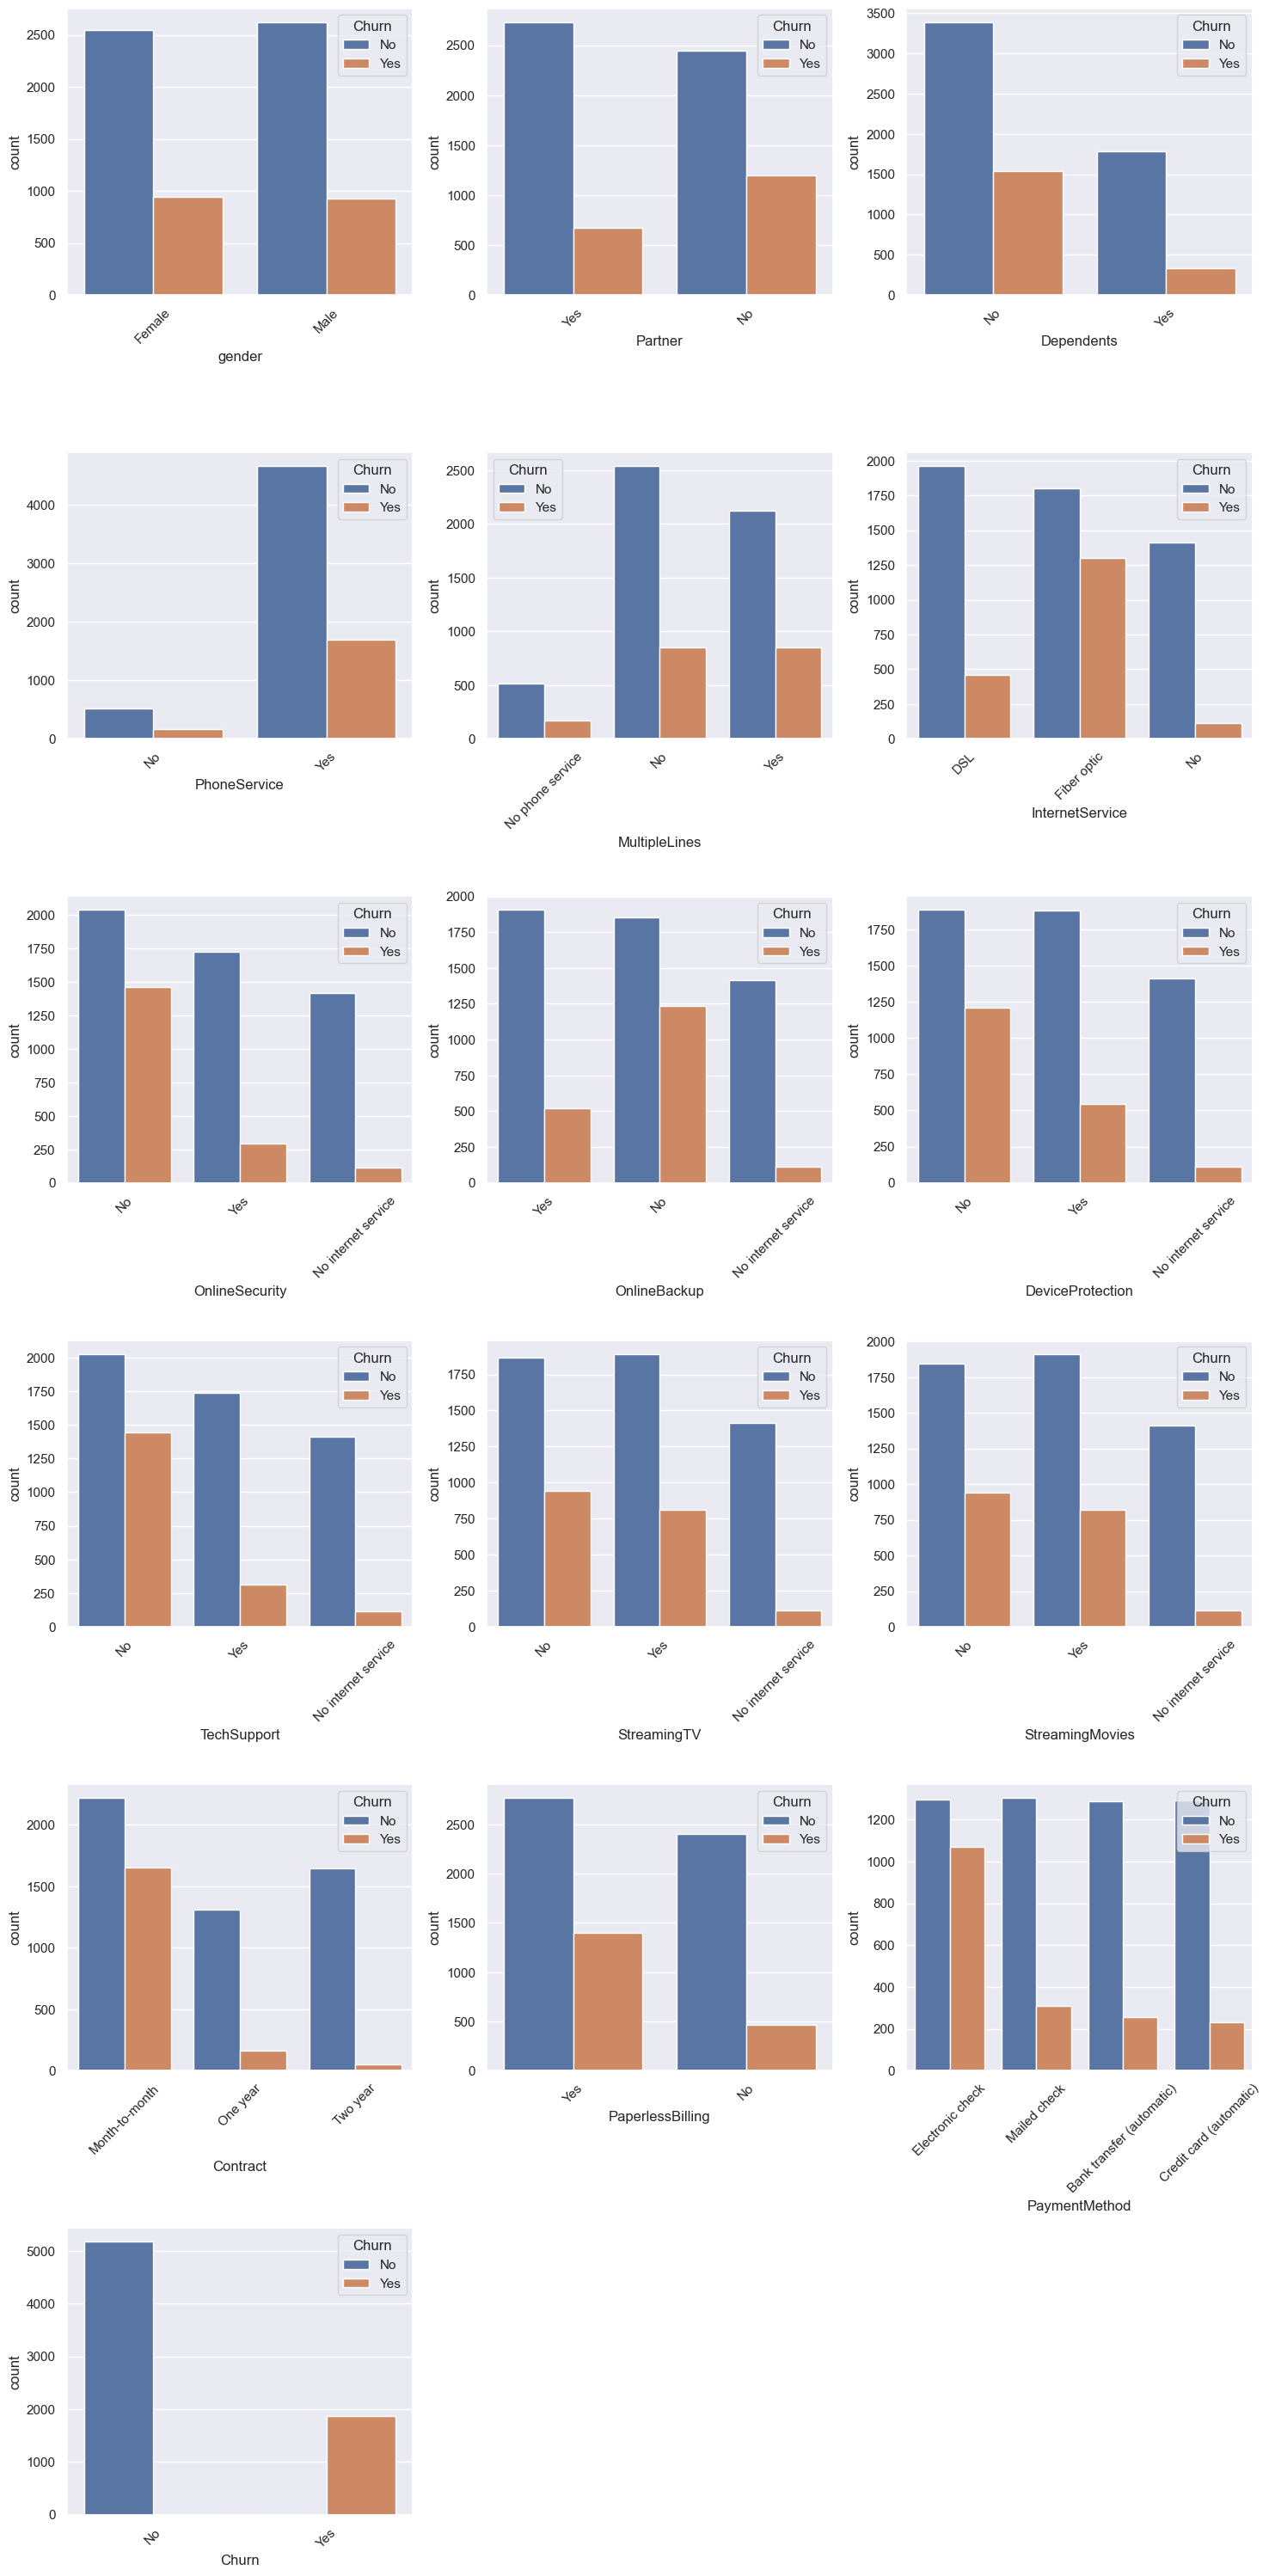

In [123]:
# Get the names of all columns with data type 'object' (categorical variables)
#cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat)
num_rows = (num_cols + 2) // 2  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Churn', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### Checking for outliers

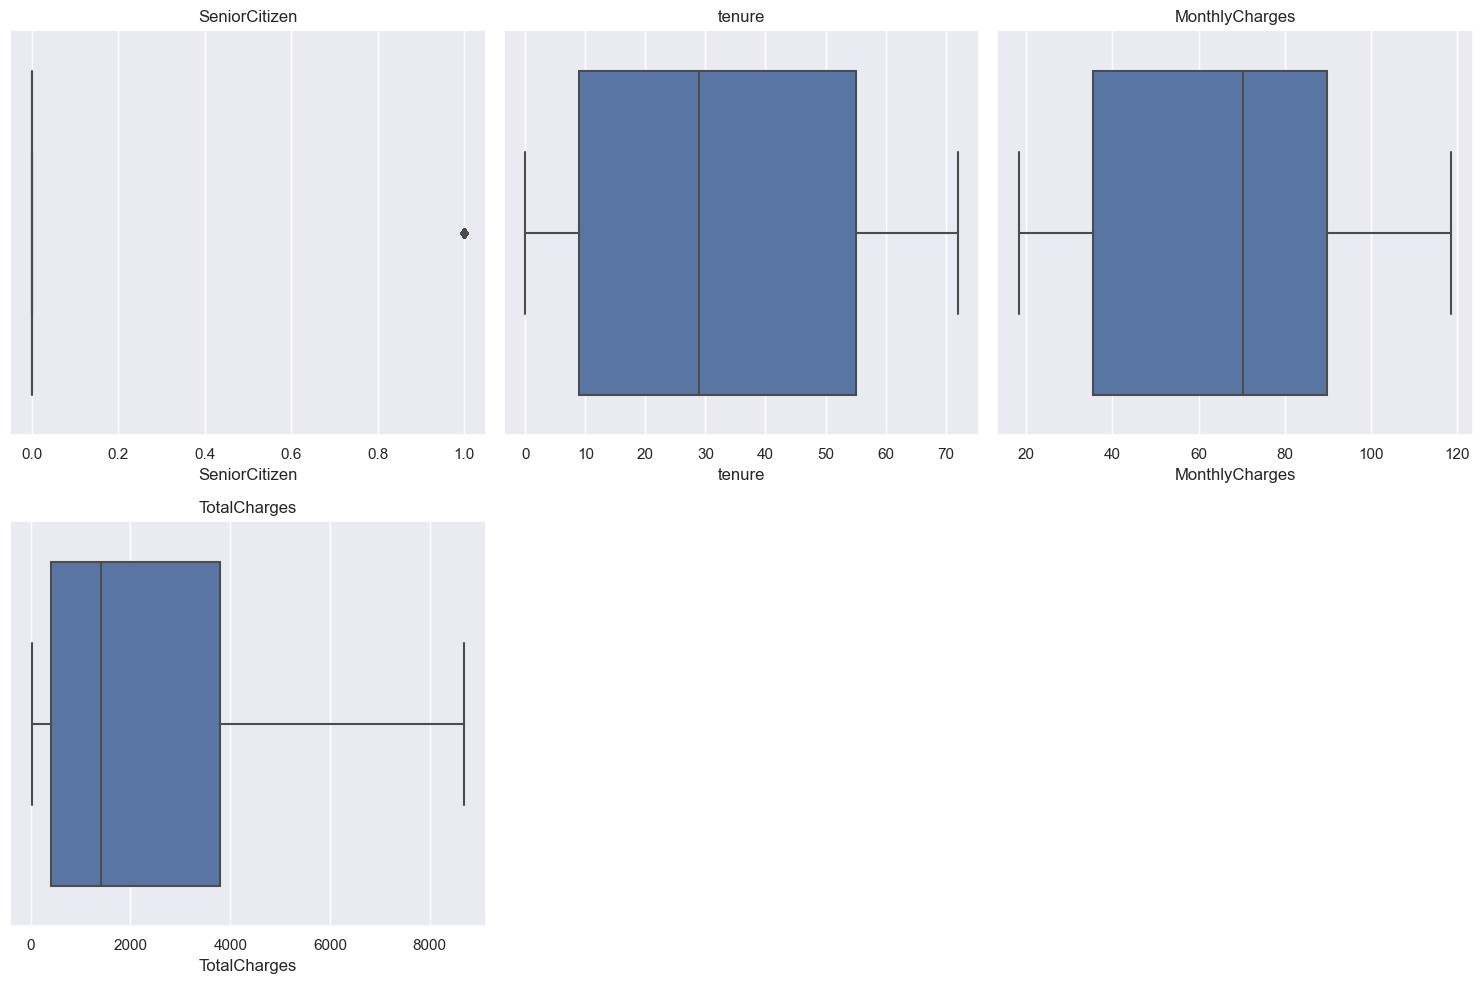

In [124]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

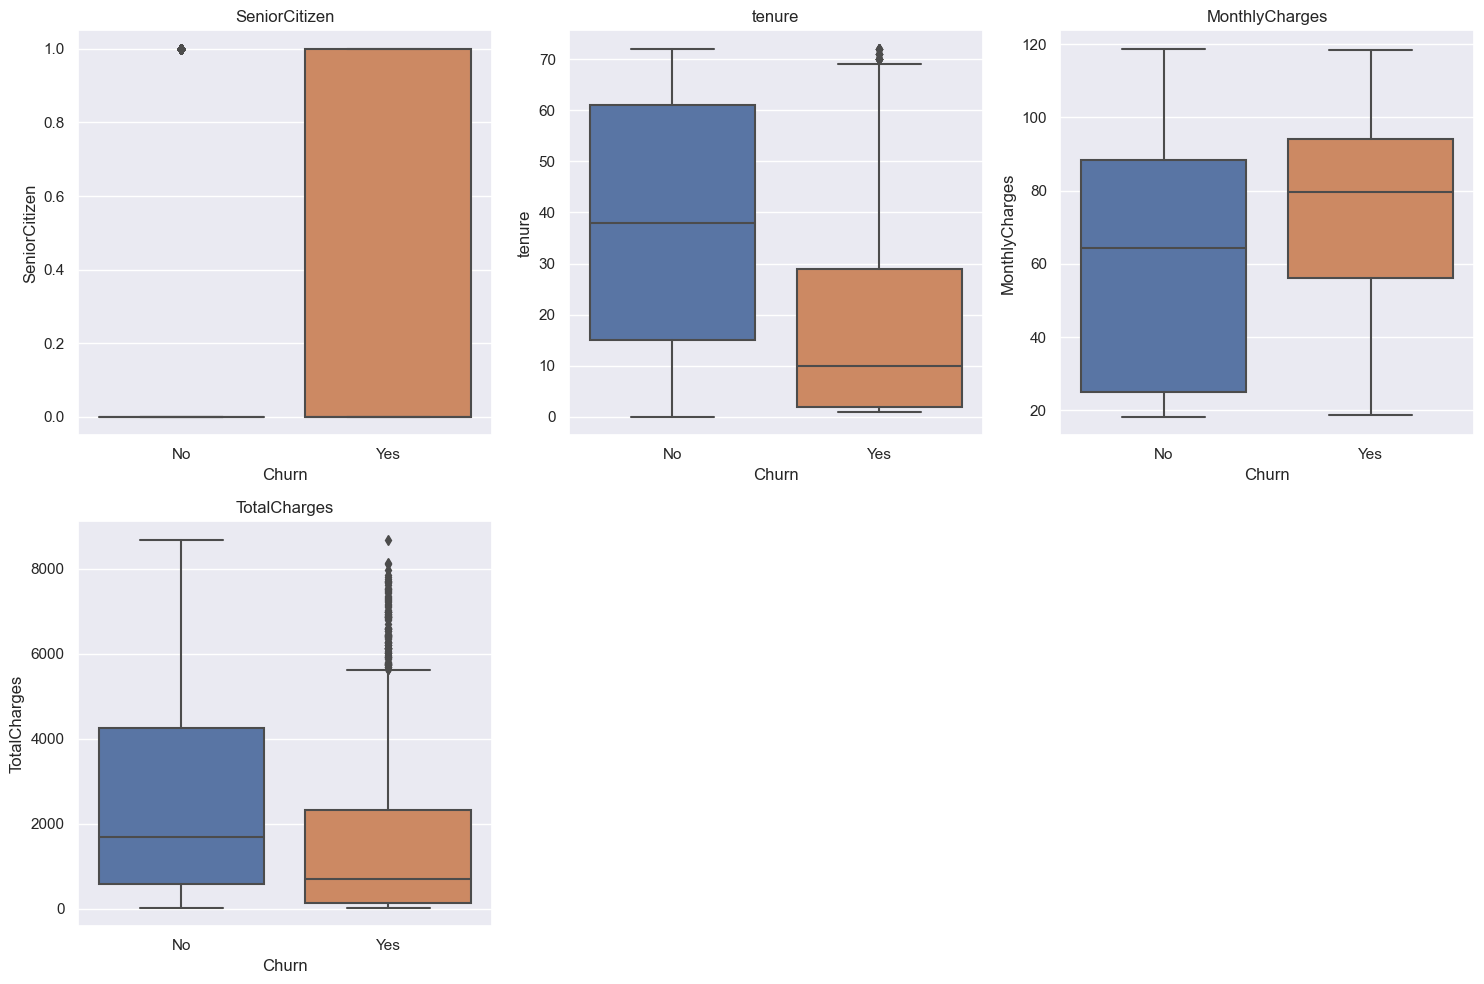

In [125]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(num):
    sns.boxplot(y=var, x='Churn', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

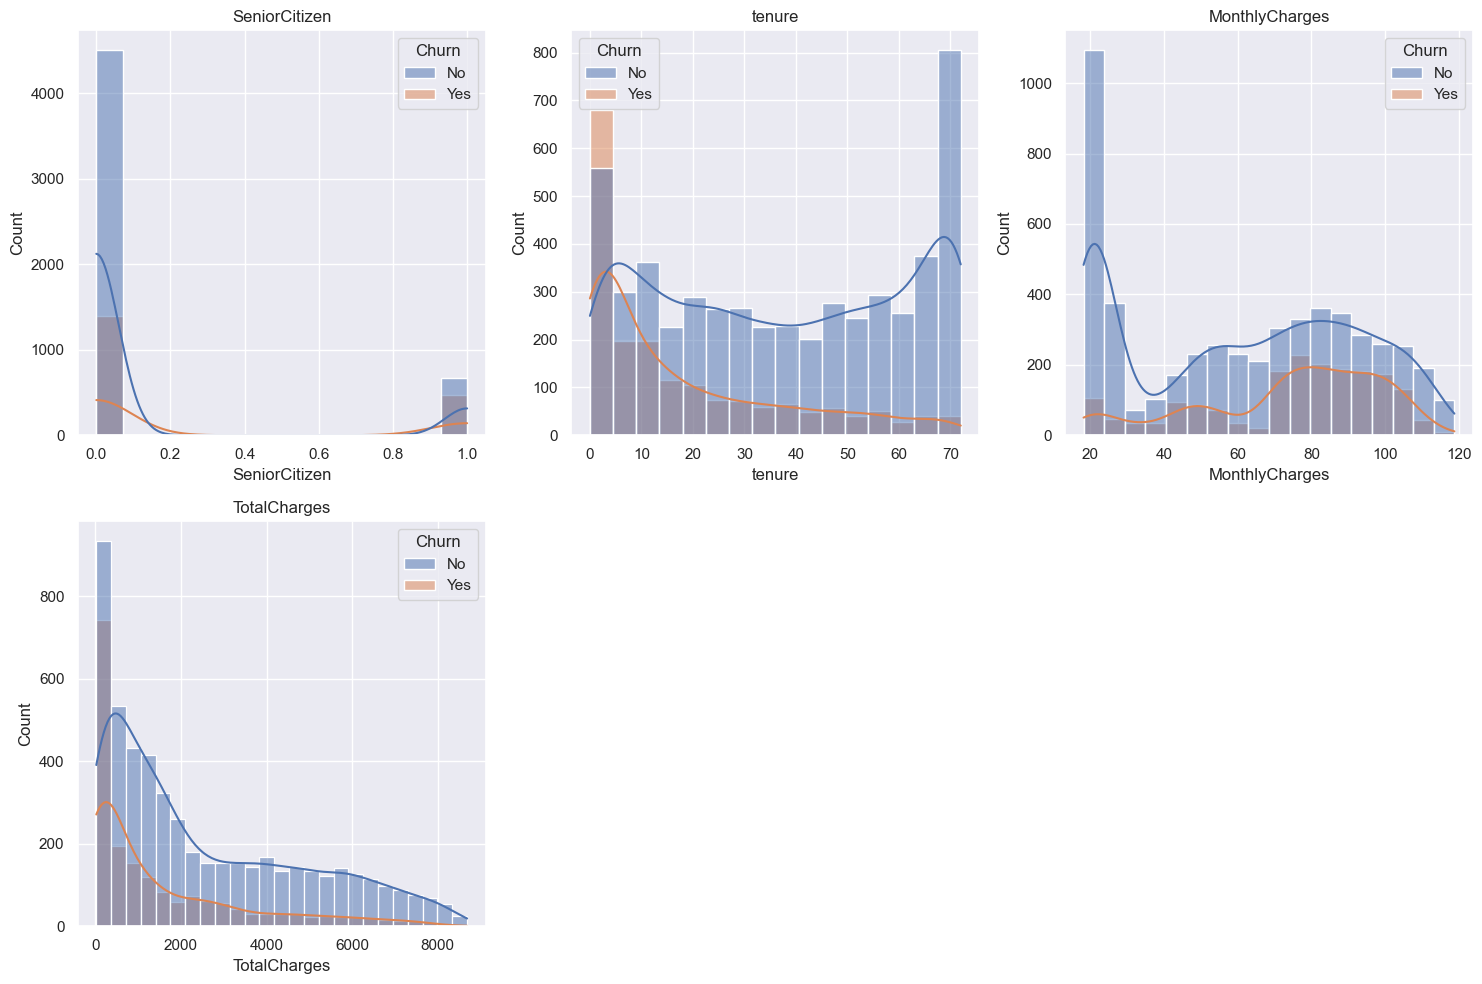

In [126]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(num):
    sns.histplot(data=df, x=var, 
                 hue='Churn', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Categorical to Numerical

In [127]:
# Categorical columns with their unique values
for i in cat:
    print("{}:- {}, {}".format(i,df[i].nunique(), df[i].unique()))

gender:- 2, ['Female' 'Male']
Partner:- 2, ['Yes' 'No']
Dependents:- 2, ['No' 'Yes']
PhoneService:- 2, ['No' 'Yes']
MultipleLines:- 3, ['No phone service' 'No' 'Yes']
InternetService:- 3, ['DSL' 'Fiber optic' 'No']
OnlineSecurity:- 3, ['No' 'Yes' 'No internet service']
OnlineBackup:- 3, ['Yes' 'No' 'No internet service']
DeviceProtection:- 3, ['No' 'Yes' 'No internet service']
TechSupport:- 3, ['No' 'Yes' 'No internet service']
StreamingTV:- 3, ['No' 'Yes' 'No internet service']
StreamingMovies:- 3, ['No' 'Yes' 'No internet service']
Contract:- 3, ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:- 2, ['Yes' 'No']
PaymentMethod:- 4, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:- 2, ['No' 'Yes']


In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])
    
    # Print the column name and the unique encoded values
    print(f"{i}: {df[i].unique()}")

gender: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [1 0 2]
InternetService: [0 1 2]
OnlineSecurity: [0 2 1]
OnlineBackup: [2 0 1]
DeviceProtection: [0 2 1]
TechSupport: [0 2 1]
StreamingTV: [0 2 1]
StreamingMovies: [0 2 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
Churn: [0 1]


<Axes: >

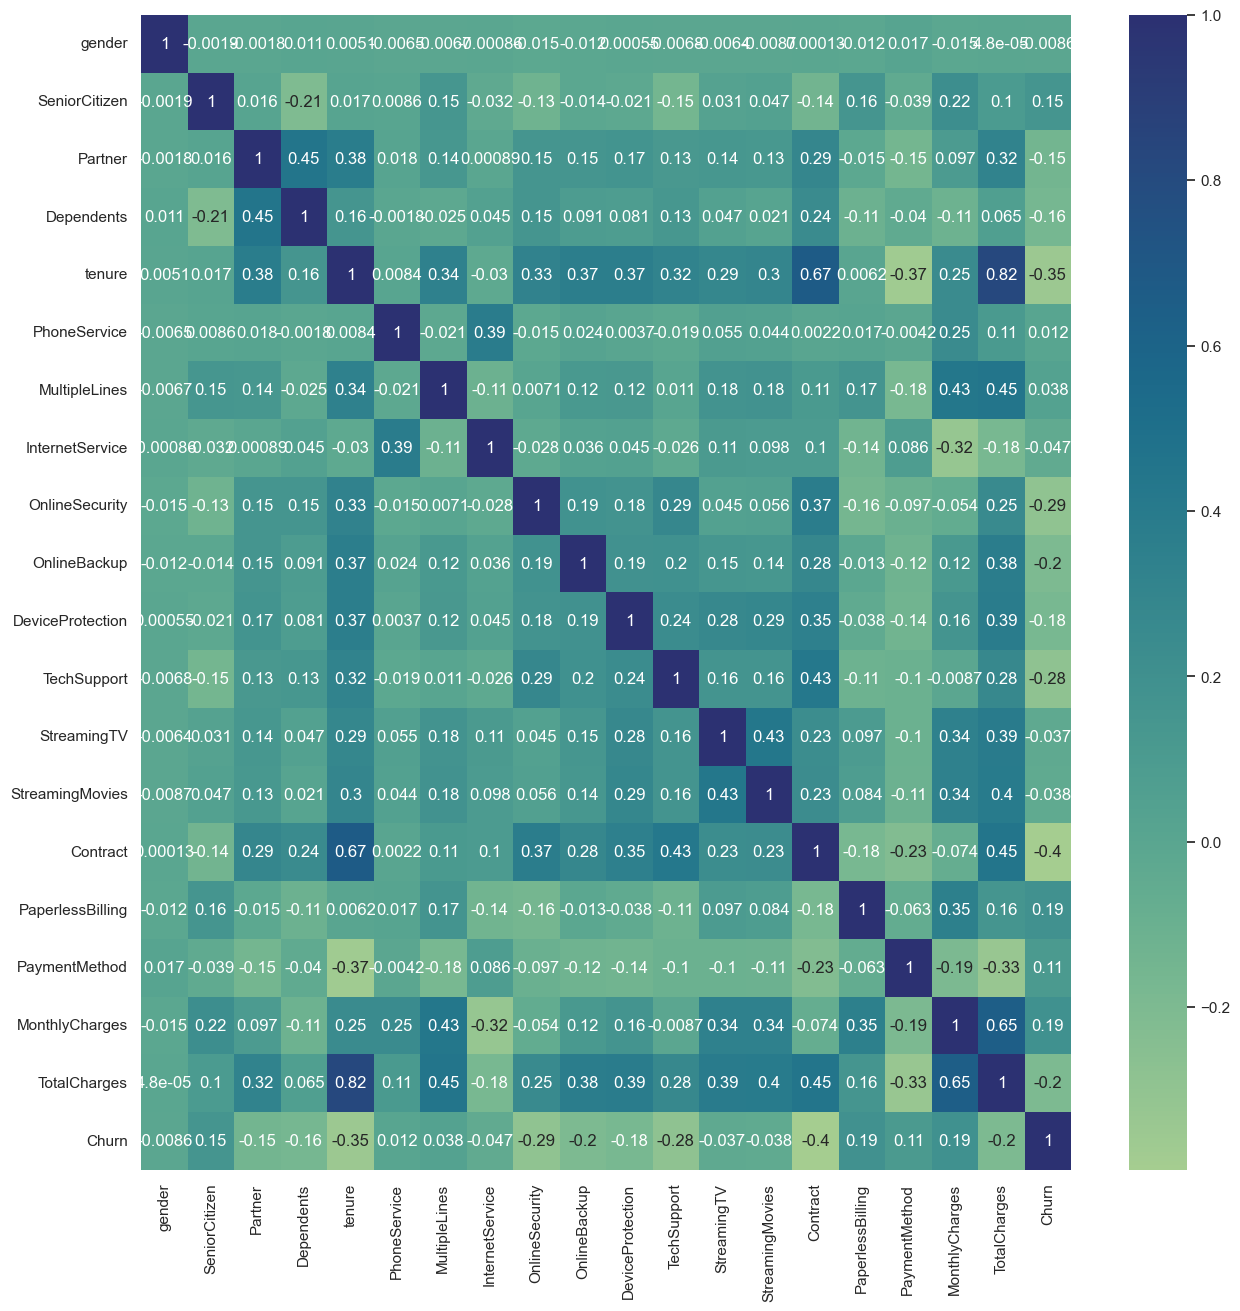

In [129]:
# checking the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="crest")

## Without Hyperparameter tuning 

## Decision Tree Classifier

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [131]:
#input data and output data
X=df.drop("Churn", axis=1)
y=df["Churn"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


### Removing Outlier from Train Data using Z-score

In [132]:
num

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [133]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [134]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [135]:
# passing the test data
y_pred=dtree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Metrics**

In [136]:
# Metrics on (y_test, y_prediction)

dtree_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",dtree_acc)
dtree_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",dtree_precision)
dtree_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",dtree_recall)
dtree_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",dtree_F1)

Accuracy:-  73.1
precision:-  0.48
recall:-  0.5
F1-score:-  0.49


confusion matrix:-  [[849 197]
 [182 181]]


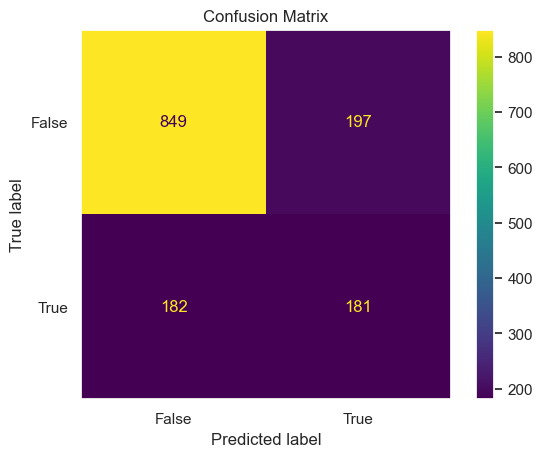

True negative: 849
False postive: 197
False negative: 182
True postive: 181


In [137]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

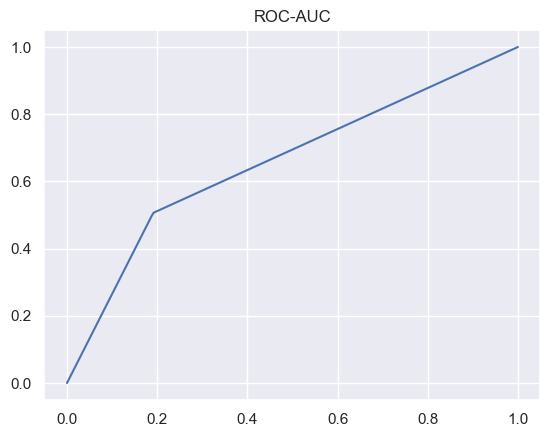

In [138]:
# s8 ROC-AUC curve
y_pred_proba=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Logistic Regression

In [139]:
#input data and output data
X=df.drop("Churn", axis=1)
y=df["Churn"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


### Removing Outlier from Train Data using Z-score

In [140]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [141]:
#  Training the model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [142]:
#s5 prediction
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

**Metrics**

In [143]:
# Metrics on (y_test, y_prediction)

logreg_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",logreg_acc)
logreg_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",logreg_precision)
logreg_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",logreg_recall)
logreg_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",logreg_F1)

Accuracy:-  79.06
precision:-  0.61
recall:-  0.54
F1-score:-  0.57


confusion matrix:-  [[919 127]
 [168 195]]


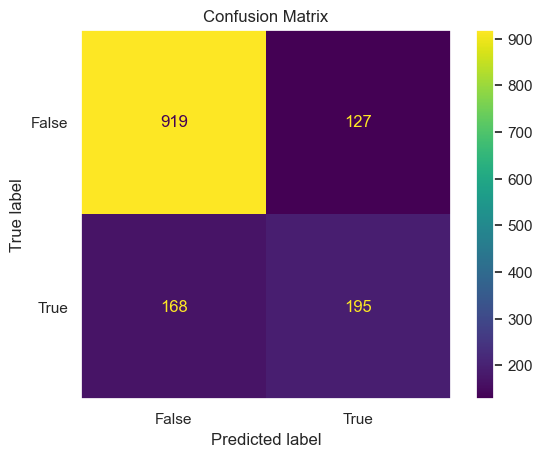

True negative: 919
False postive: 127
False negative: 168
True postive: 195


In [144]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

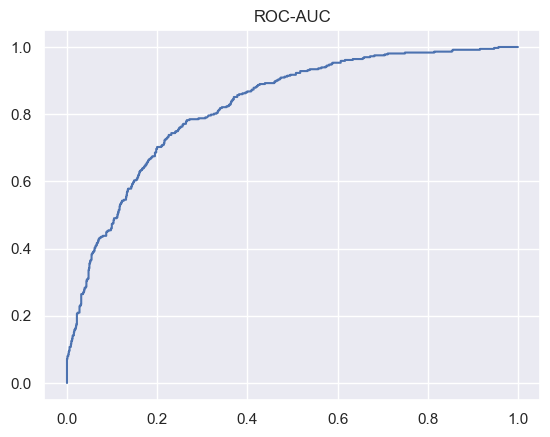

In [145]:
#  ROC-AUC curve
y_pred_proba=logreg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Naive Bayes

In [146]:
#input data and output data
X=df.drop("Churn", axis=1)
y=df["Churn"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


### Removing Outlier from Train Data using Z-score

In [147]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [148]:
# s4 Training the model
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(X_train, y_train)

GaussianNB()

In [149]:
#s5 prediction
y_pred=gNB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

**Metrics**

In [150]:
# Metrics on (y_test, y_prediction)
gNB_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",gNB_acc)
gNB_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",gNB_precision)
gNB_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",gNB_recall)
gNB_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",gNB_F1)

Accuracy:-  73.67
precision:-  0.49
recall:-  0.72
F1-score:-  0.58


confusion matrix:-  [[778 268]
 [103 260]]


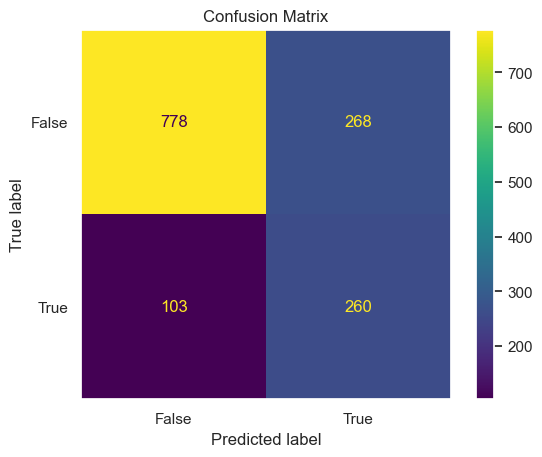

True negative: 778
False postive: 268
False negative: 103
True postive: 260


In [151]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

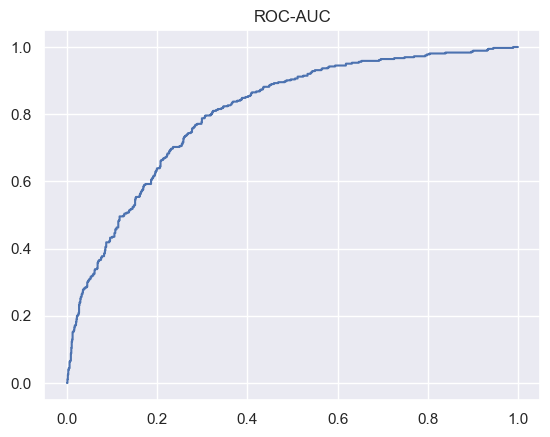

In [152]:
#  ROC-AUC curve
y_pred_proba=gNB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## KNN

In [153]:
#input data and output data
X=df.drop("Churn", axis=1)
y=df["Churn"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


### Removing Outlier from Train Data using Z-score

In [154]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [155]:
#  Training the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [156]:
# prediction
y_pred=knn.predict(X_test.values)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

**Metrics**

In [157]:
# Metrics on (y_test, y_prediction)
knn_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",knn_acc)
knn_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",knn_precision)
knn_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",knn_recall)
knn_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",knn_F1)

Accuracy:-  75.73
precision:-  0.54
recall:-  0.42
F1-score:-  0.47


confusion matrix:-  [[913 133]
 [209 154]]


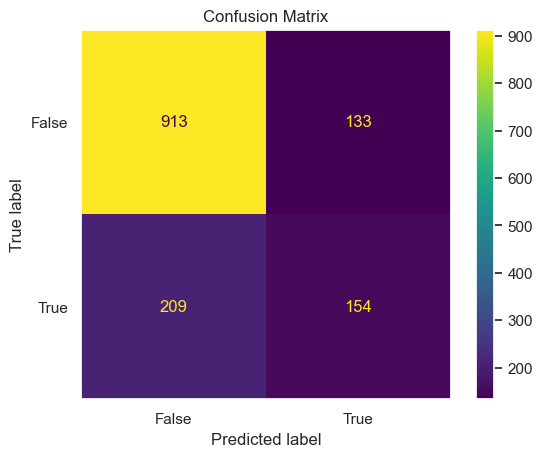

True negative: 913
False postive: 133
False negative: 209
True postive: 154


In [158]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

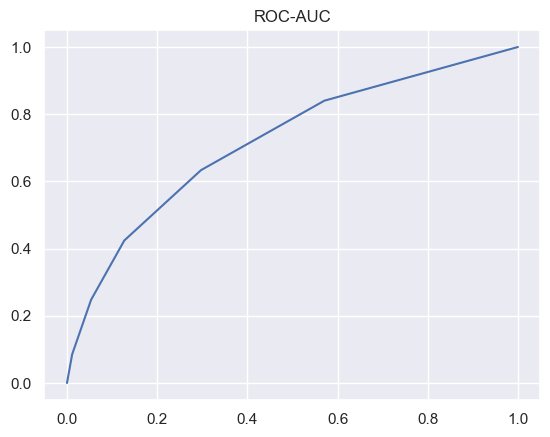

In [161]:
#  ROC-AUC curve
y_pred_proba=knn.predict_proba(X_test.values)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Random Forest

In [162]:
#input data and output data
X=df.drop("Churn", axis=1)
y=df["Churn"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


### Removing Outlier from Train Data using Z-score

In [163]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [164]:
#  Training the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
# prediction
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Metrics**

In [166]:
# Metrics on (y_test, y_prediction)
rfc_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",rfc_acc)
rfc_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",rfc_precision)
rfc_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",rfc_recall)
rfc_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",rfc_F1)

Accuracy:-  77.86
precision:-  0.59
recall:-  0.47
F1-score:-  0.52


confusion matrix:-  [[926 120]
 [192 171]]


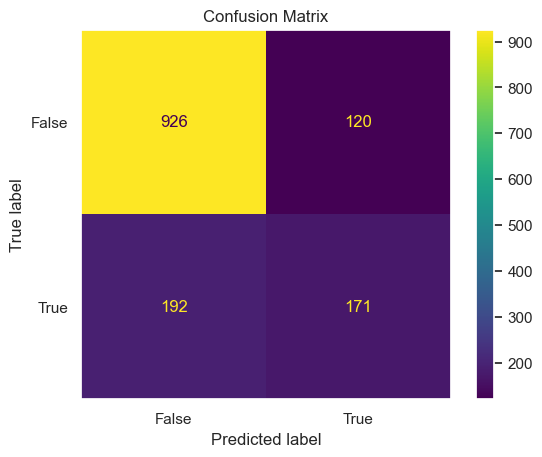

True negative: 926
False postive: 120
False negative: 192
True postive: 171


In [167]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

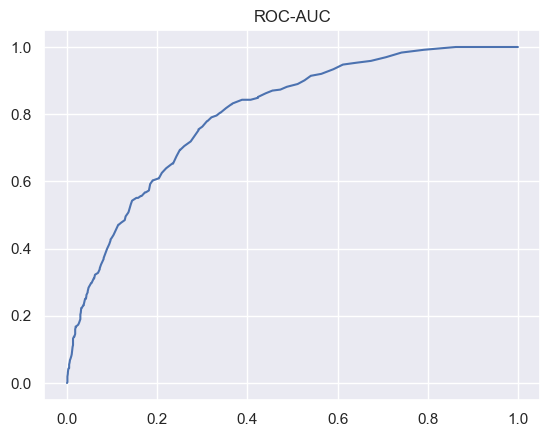

In [168]:
#  ROC-AUC curve
y_pred_proba=rfc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Metrices df

**Combine Metrices df of models without hyperparameters**

In [169]:
dict1={"Accuracy":[dtree_acc,logreg_acc,gNB_acc,knn_acc,rfc_acc],
      "Precision":[dtree_precision,logreg_precision,gNB_precision,knn_precision,rfc_precision],
      "Recall":[dtree_recall,logreg_recall,gNB_recall,knn_recall,rfc_recall],
      "F1-score":[dtree_F1,logreg_F1,gNB_F1,knn_F1,rfc_F1]}

dict1=pd.DataFrame(dict1,index=['Decision Tree','Logistic Reg.','Naive Bayes','KNN','Random Forest'])
dict1

,Accuracy,Precision,Recall,F1-score
Decision Tree,73.10,0.48,0.50,0.49
Logistic Reg.,79.06,0.61,0.54,0.57
Naive Bayes,73.67,0.49,0.72,0.58
KNN,75.73,0.54,0.42,0.47
Random Forest,77.86,0.59,0.47,0.52


### Selecting the best model

### Logistic Regression

In [170]:
logreg

LogisticRegression()

In [174]:
logreg.predict(X_test)[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [176]:
y_test[:10]

6692    0
2624    0
1076    0
1428    1
7026    1
2886    0
3049    1
1032    1
6661    0
240     0
Name: Churn, dtype: int32

<h3><center><b> $Thank-You$